In [5]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
from DelayControlSystem.delay_control import *

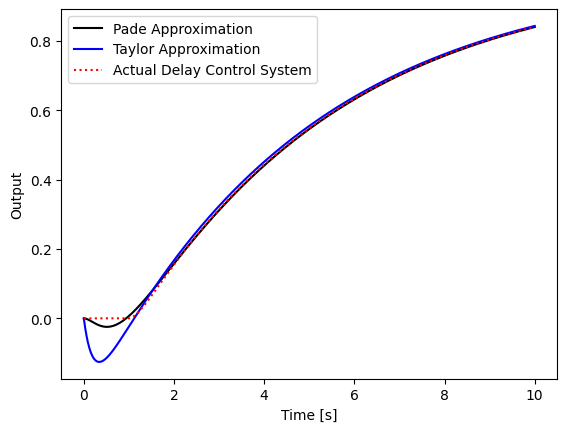

In [6]:
s = ctrl.TransferFunction.s
G = 1 / (s**2 + 5 * s + 1)
theta = 1
D1 = (-0.5 * theta * s + 1) / (0.5 * theta * s + 1)
D2 = 1 - theta * s
G1 = G * D1
G2 = G * D2
T = 10
dt = 0.01
t = np.linspace(0, T, int(T / dt))
f = 0.1
# u = np.sin(2 * t * np.pi * f)
u = np.ones_like(t)
t1, y1 = ctrl.forced_response(G1, T=t, U=u)
t2, y2 = ctrl.forced_response(G2, T=t, U=u)
yt = []
G3 = DelayControlSystem(G, delay_time=theta, dt=dt)
for t_val, u_val in zip(t, u):
    _, y, _ = G3.step(u_val)
    yt.append(y)

plt.plot(t1, y1, "k", label="Pade Approximation")
plt.plot(t2, y2, "b", label="Taylor Approximation")
plt.plot(t, yt, "r:", label="Actual Delay Control System")
plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.legend()

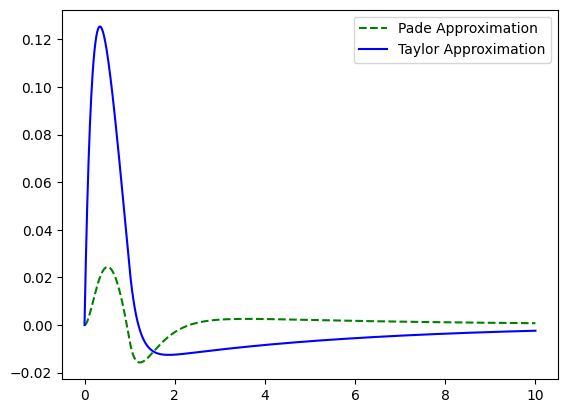

In [7]:
e1 = [(yt[i] - y1[i]) for i in range(len(t))]
e2 = [(yt[i] - y2[i]) for i in range(len(t))]
# plt.plot(G3.t, G3.y, "r:", label="DelayControlSystem")
plt.plot(t1, e1, "g--", label="Pade Approximation")
plt.plot(t2, e2, "b-", label="Taylor Approximation")
# plt.plot(t, u, "--", label="Input")
plt.legend()

In [8]:
np.size(G3.x, 0)

1001